In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [15]:
path = "../data/api_data_aadhar_demographic/*.csv"
files = glob.glob(path)

print("Files found:", len(files))

df_list = [pd.read_csv(file) for file in files]
demo_df = pd.concat(df_list, ignore_index=True)

demo_df.head()


Files found: 5


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [19]:
demo_df.isnull().sum()



date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

In [20]:
demo_age_columns = [col for col in demo_df.columns if col.startswith("demo_age")]

demo_age_columns


['demo_age_5_17', 'demo_age_17_']

In [21]:
demo_df["total_demo_updates"] = demo_df[demo_age_columns].sum(axis=1)

demo_df[demo_age_columns + ["total_demo_updates"]].head()


,demo_age_5_17,demo_age_17_,total_demo_updates
0,49,529,578
1,22,375,397
2,65,765,830
3,24,314,338
4,45,785,830


In [22]:
state_demo_updates = (
    demo_df
    .groupby("state")["total_demo_updates"]
    .sum()
    .reset_index()
    .sort_values(by="total_demo_updates", ascending=False)
)

state_demo_updates.head(10)


,state,total_demo_updates
51,Uttar Pradesh,8542328
32,Maharashtra,5054602
7,Bihar,4814350
58,West Bengal,3872172
31,Madhya Pradesh,2912938
46,Rajasthan,2817615
3,Andhra Pradesh,2295505
48,Tamil Nadu,2212228
10,Chhattisgarh,2005434
19,Gujarat,1824327


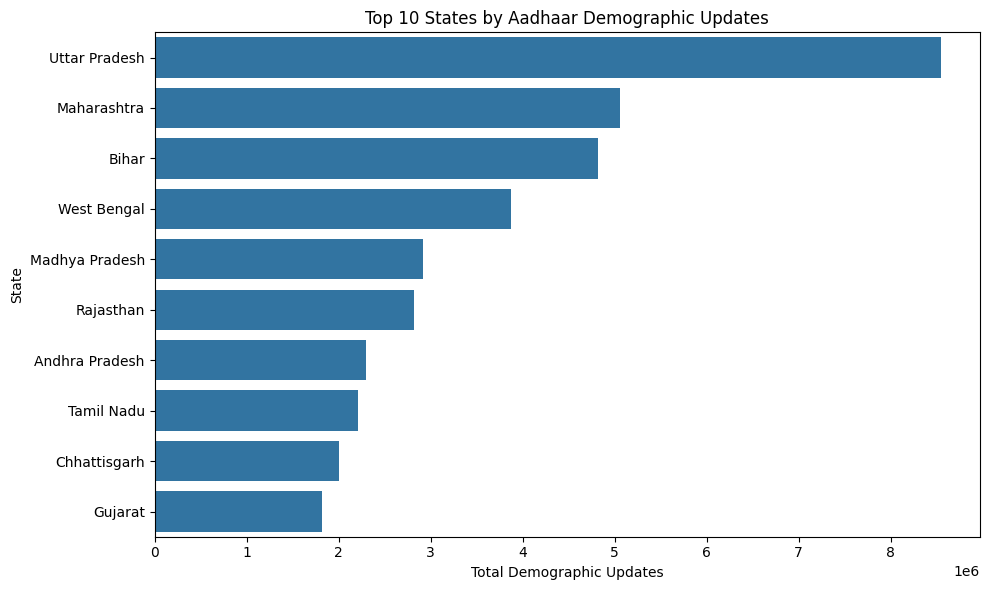

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=state_demo_updates.head(10),
    x="total_demo_updates",
    y="state"
)

plt.title("Top 10 States by Aadhaar Demographic Updates")
plt.xlabel("Total Demographic Updates")
plt.ylabel("State")
plt.tight_layout()
plt.show()
